In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tifffile import imsave
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import tensorflow as tf

Using TensorFlow backend.


In [30]:
def gray_to_rgb(img):
    return np.repeat(img, 3, 2)
    

train_datagen = ImageDataGenerator(rescale = 1./255)#,\
                             #zoom_range = [0.5, 1.0],\
                             #rotation_range = 90,\
                             #horizontal_flip = True,\
                             #vertical_flip = True)
#                             brightness_range = [0.2, 1.0])#,\
                             #preprocessing_function = gray_to_rgb)

train_gen = train_datagen.flow_from_directory('../Images/train/',\
                                              batch_size = 10,\
                                            color_mode = 'rgb')


Found 300 images belonging to 2 classes.


In [31]:
validate_datagen = ImageDataGenerator(rescale = 1./255)#,\
#                             zoom_range = [0.5, 1.0],\
#                             rotation_range = 90,\
#                             horizontal_flip = True,\
#                             vertical_flip = True,\
#                             brightness_range = [0.2, 1.0])#,\
                             #preprocessing_function = gray_to_rgb)

validate_gen = validate_datagen.flow_from_directory('../Images/validate/',\
                                              batch_size = 10,\
                                            color_mode = 'rgb')

Found 105 images belonging to 2 classes.


In [5]:
#Practice using transfer learning to perform neural network using InceptionV3
#base model.
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras import backend as K
base_model = VGG16(weights = 'imagenet',\
                         include_top = False,
                         input_shape = (256, 256, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(2, activation = 'softmax')(x)

model = Model(inputs = base_model.inputs, outputs = predictions)

for layer in base_model.layers[:-3]:
    layer.trainable = False

model.compile(loss = 'categorical_crossentropy',\
              optimizer = 'Adam',\
              metrics = ['accuracy'])

In [33]:
classifier = model.fit_generator(train_gen,\
                   validation_data = validate_gen,\
                   steps_per_epoch = 30,\
                   validation_steps = 10,
                   epochs = 10)

Epoch 1/10
30/30 [==============================] - 180s 6s/step - loss: 0.3942 - acc: 0.8333 - val_loss: 0.0544 - val_acc: 0.9600
Epoch 2/10
30/30 [==============================] - 182s 6s/step - loss: 0.0538 - acc: 0.9767 - val_loss: 6.2282e-04 - val_acc: 1.0000
Epoch 3/10
30/30 [==============================] - 179s 6s/step - loss: 0.0456 - acc: 0.9867 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 4/10
30/30 [==============================] - 186s 6s/step - loss: 0.0510 - acc: 0.9867 - val_loss: 5.8990e-04 - val_acc: 1.0000
Epoch 5/10
30/30 [==============================] - 186s 6s/step - loss: 0.0134 - acc: 0.9967 - val_loss: 1.6554e-05 - val_acc: 1.0000
Epoch 6/10
30/30 [==============================] - 196s 7s/step - loss: 0.1016 - acc: 0.9767 - val_loss: 0.0595 - val_acc: 0.9474
Epoch 7/10
30/30 [==============================] - 203s 7s/step - loss: 0.0107 - acc: 0.9967 - val_loss: 6.9944e-06 - val_acc: 1.0000
Epoch 8/10
30/30 [==============================] - 195s 6s/step - 

In [34]:
model.save('Chem5_Class_Aug_VGG16_3.h5')

In [6]:
from keras.models import load_model
model=load_model('Chem5_Class_VGG16_2.h5')

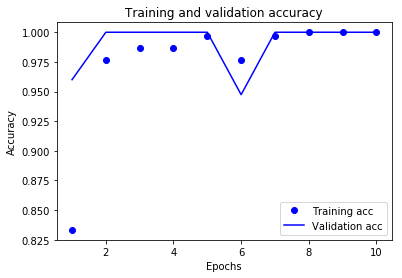

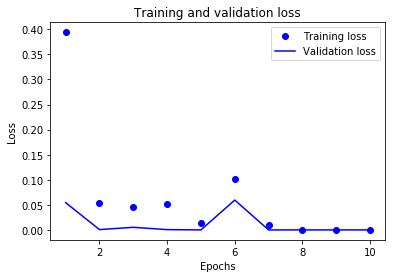

In [35]:
#holdacc = acc
#holdvalacc = val_acc
#holdloss = loss
#holdvalloss = val_loss
#hold2acc = acc
#hold2valacc = val_acc
#hold2loss = loss
#hold2valloss = val_loss

acc =  classifier.history['acc']
val_acc = classifier.history['val_acc']
loss = classifier.history['loss']
val_loss = classifier.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('../Documents/IMages_modeling/ChemGen2_3_tv_acc.png')

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../Documents/IMages_modeling/ChemGen2_3_tv_loss.png')

plt.show()

In [7]:
layer_outputs = [layer.output for layer in model.layers[1:19]]

activation_model = Model(inputs = model.input,\
                         outputs = layer_outputs)

(256, 256)


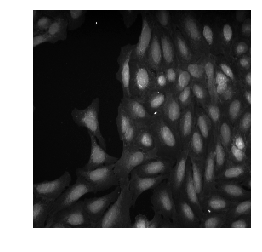

In [18]:
filename = '../Images/train/chem_train/class0/classA04_1_comb.tif'
def gray_to_rgb(img):
    return np.repeat(img, 3, 2)

im = Image.open(filename)
im = im.resize((256, 256))
im_temp = np.array(im)

print(im_temp.shape)
im_temp = np.expand_dims(im_temp, 2)
im_temp = gray_to_rgb(im_temp)
im_temp = np.expand_dims(im_temp, 0)
im_temp = im_temp/255.

plt.imshow(im_temp[0,:,:,0], cmap = 'gray')
plt.axis('off')
plt.savefig('BaseImages.png', bbox_inches = 'tight')
plt.show()

In [12]:
activations = activation_model.predict(im_temp)

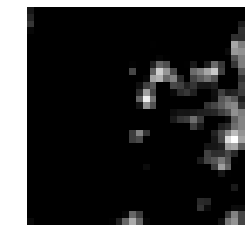

In [15]:
#1, 4, 7, 11
im_act = activations[11]
plt.imshow(im_act[0,:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()

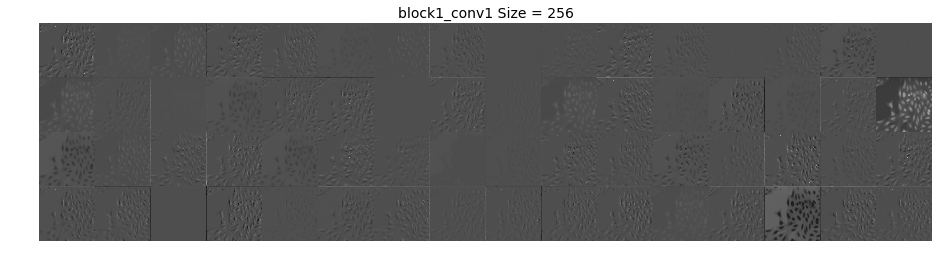

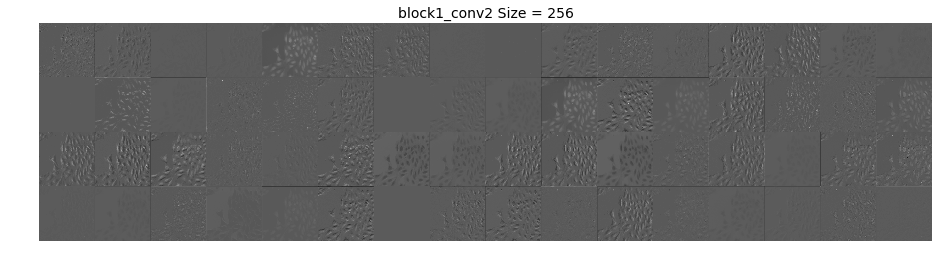

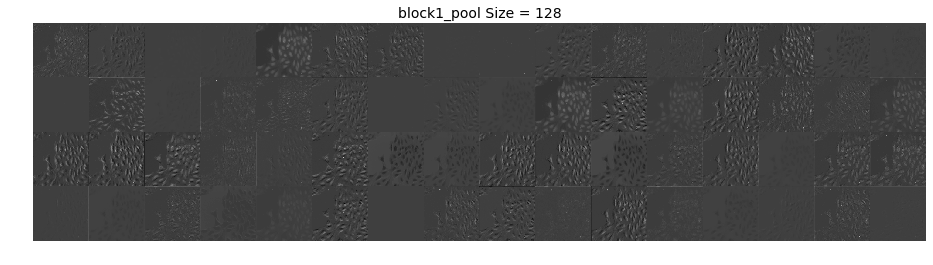

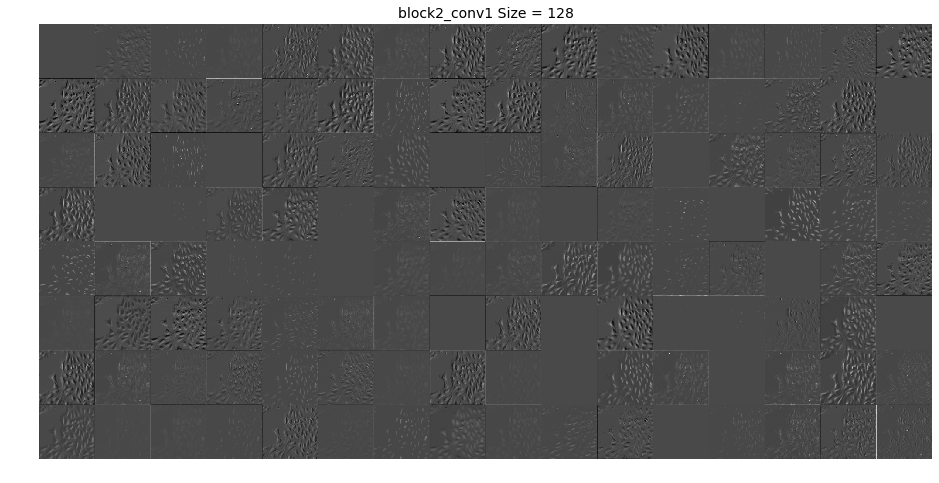

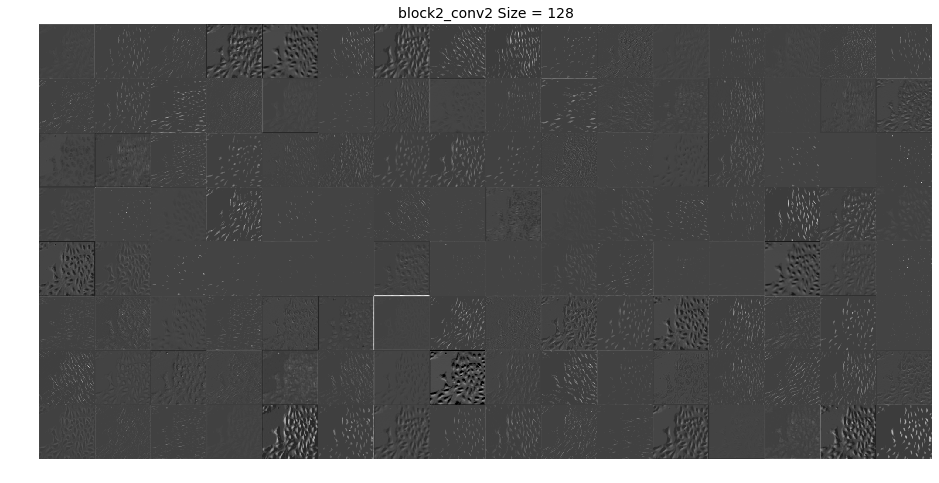

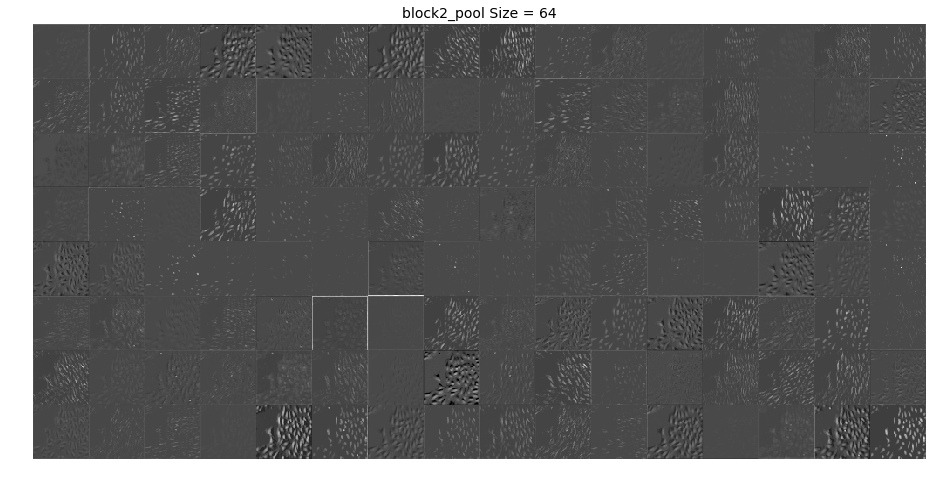

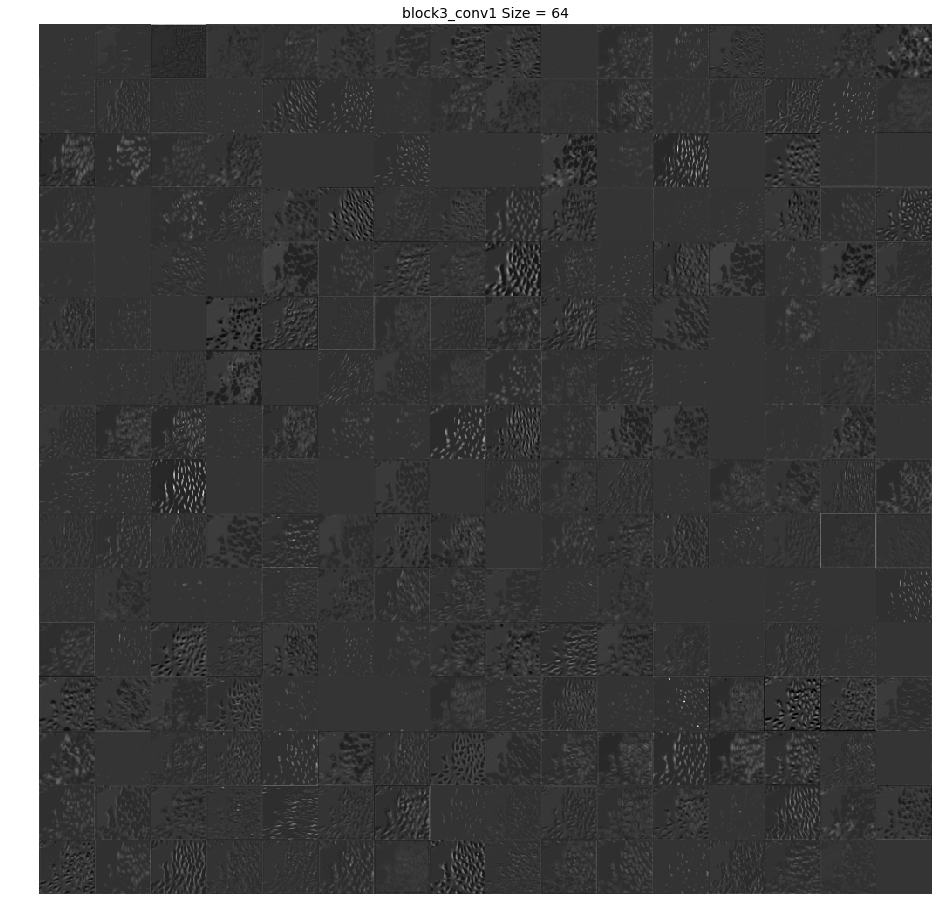

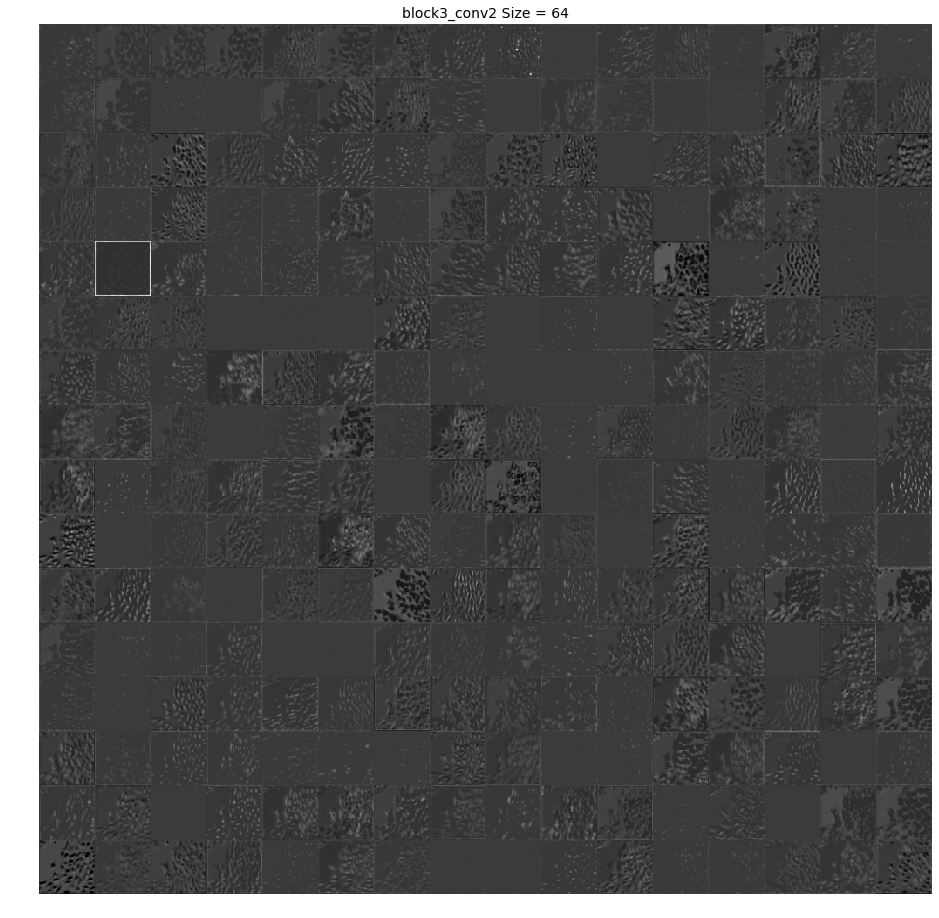

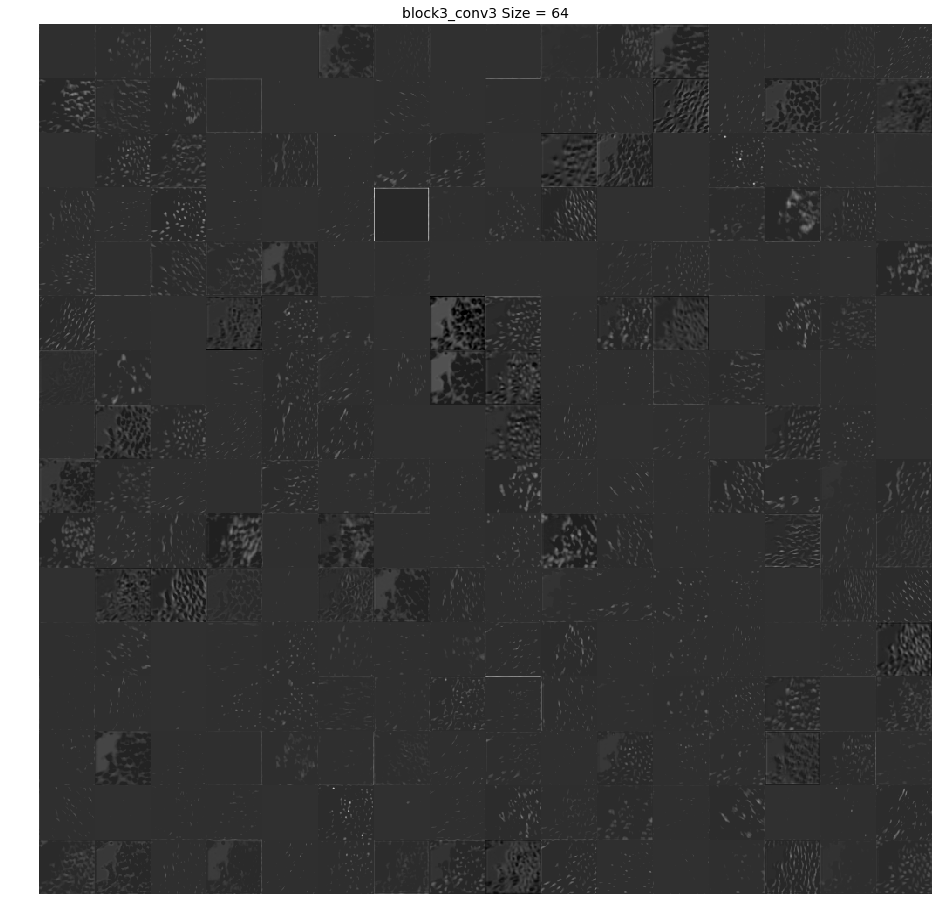

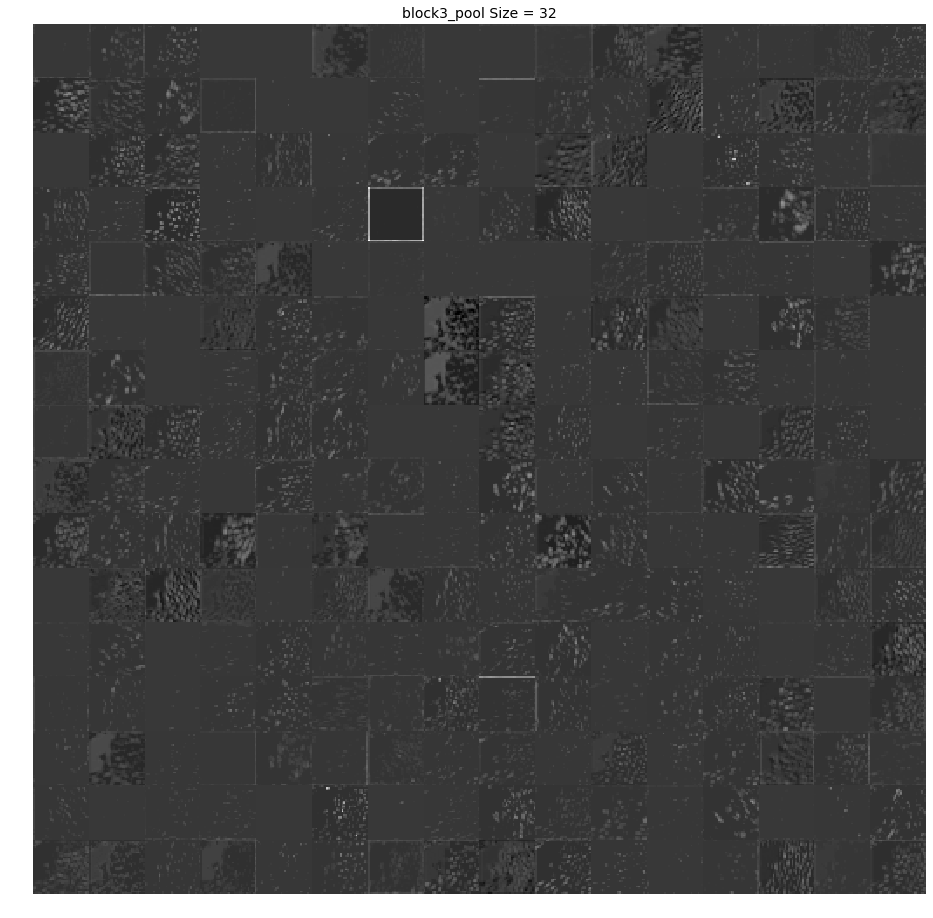

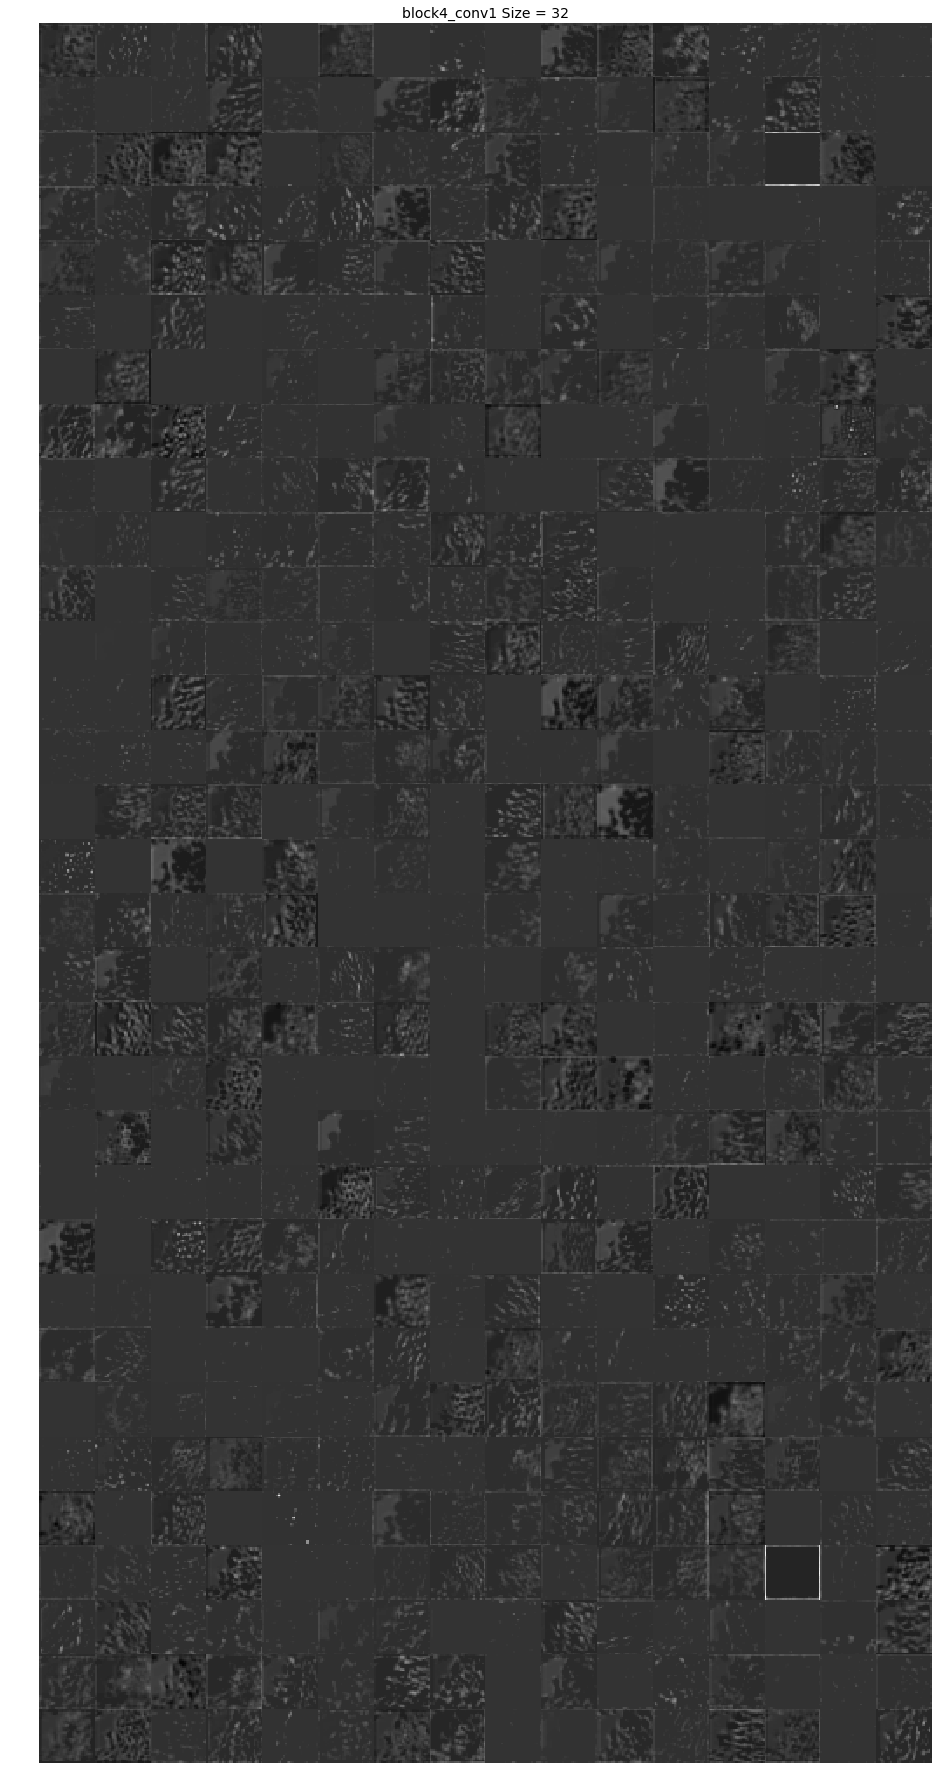

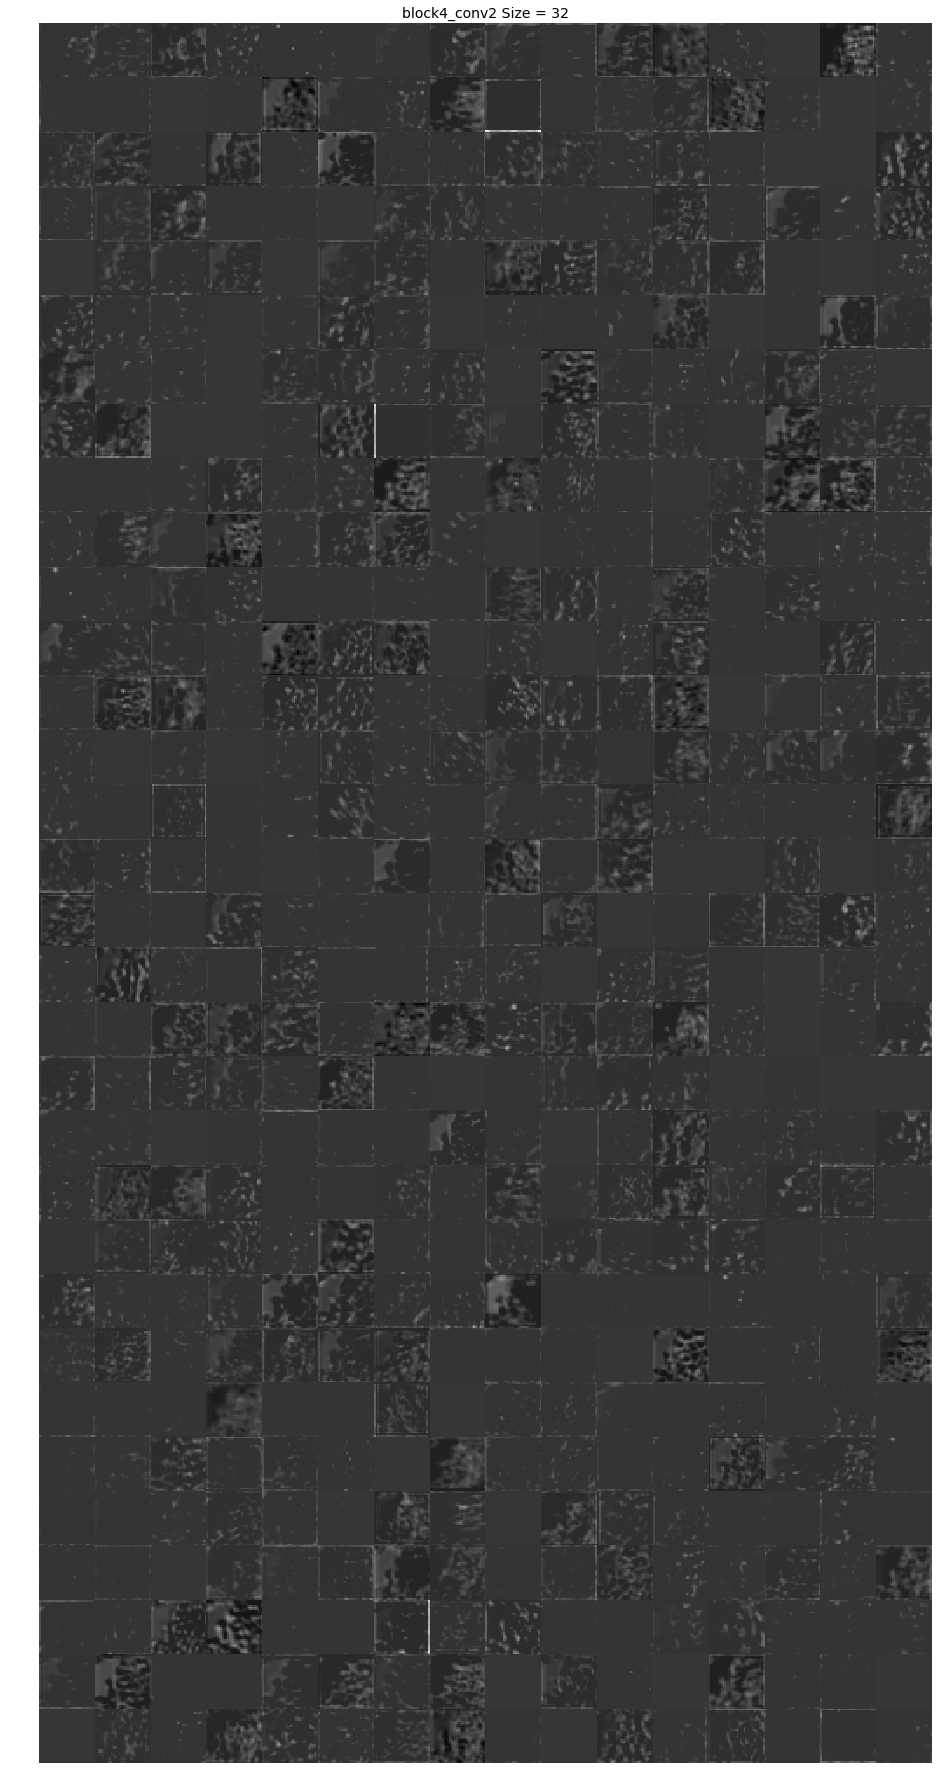

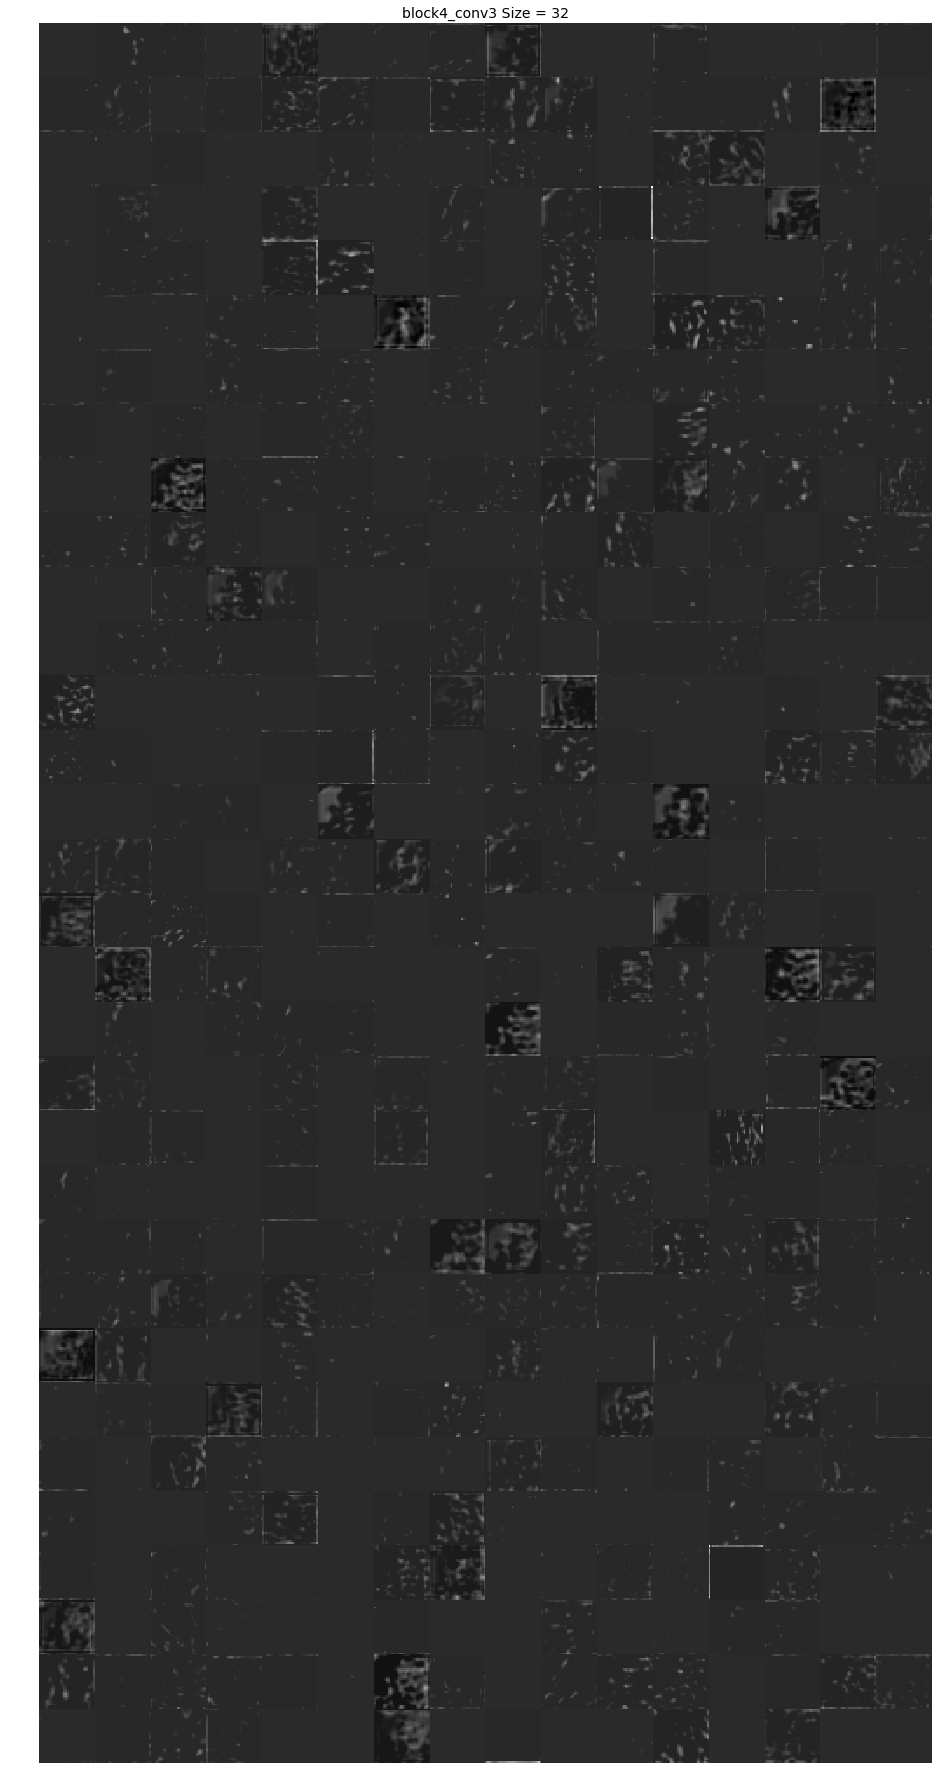

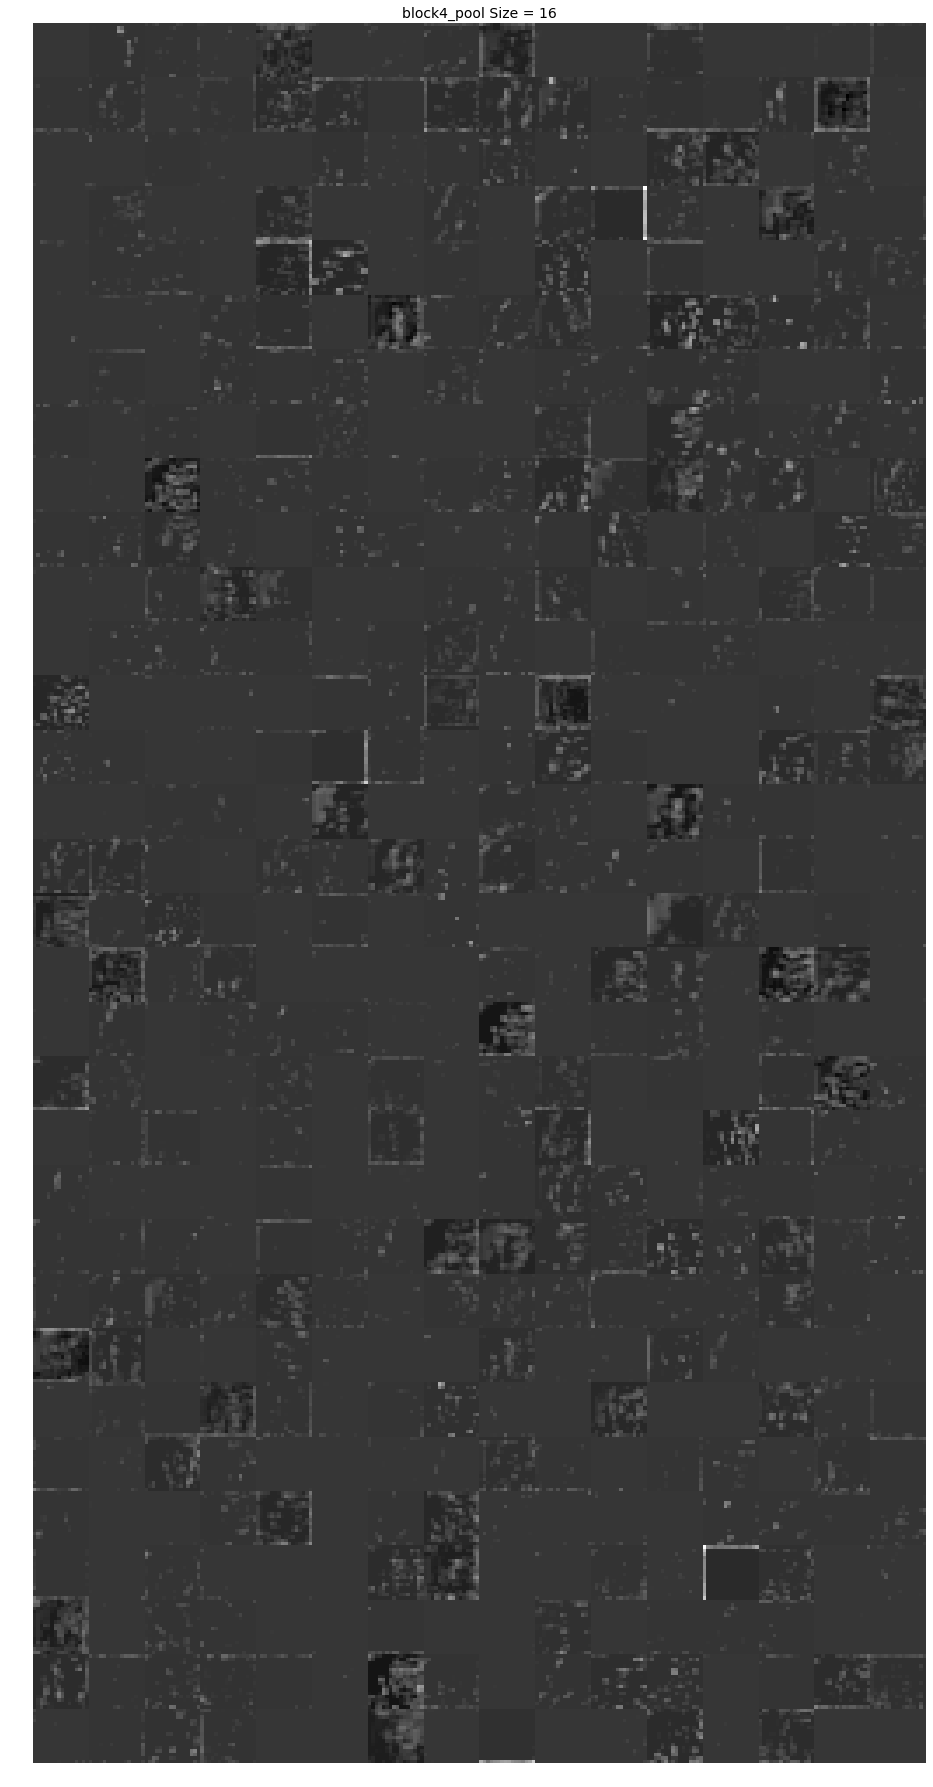

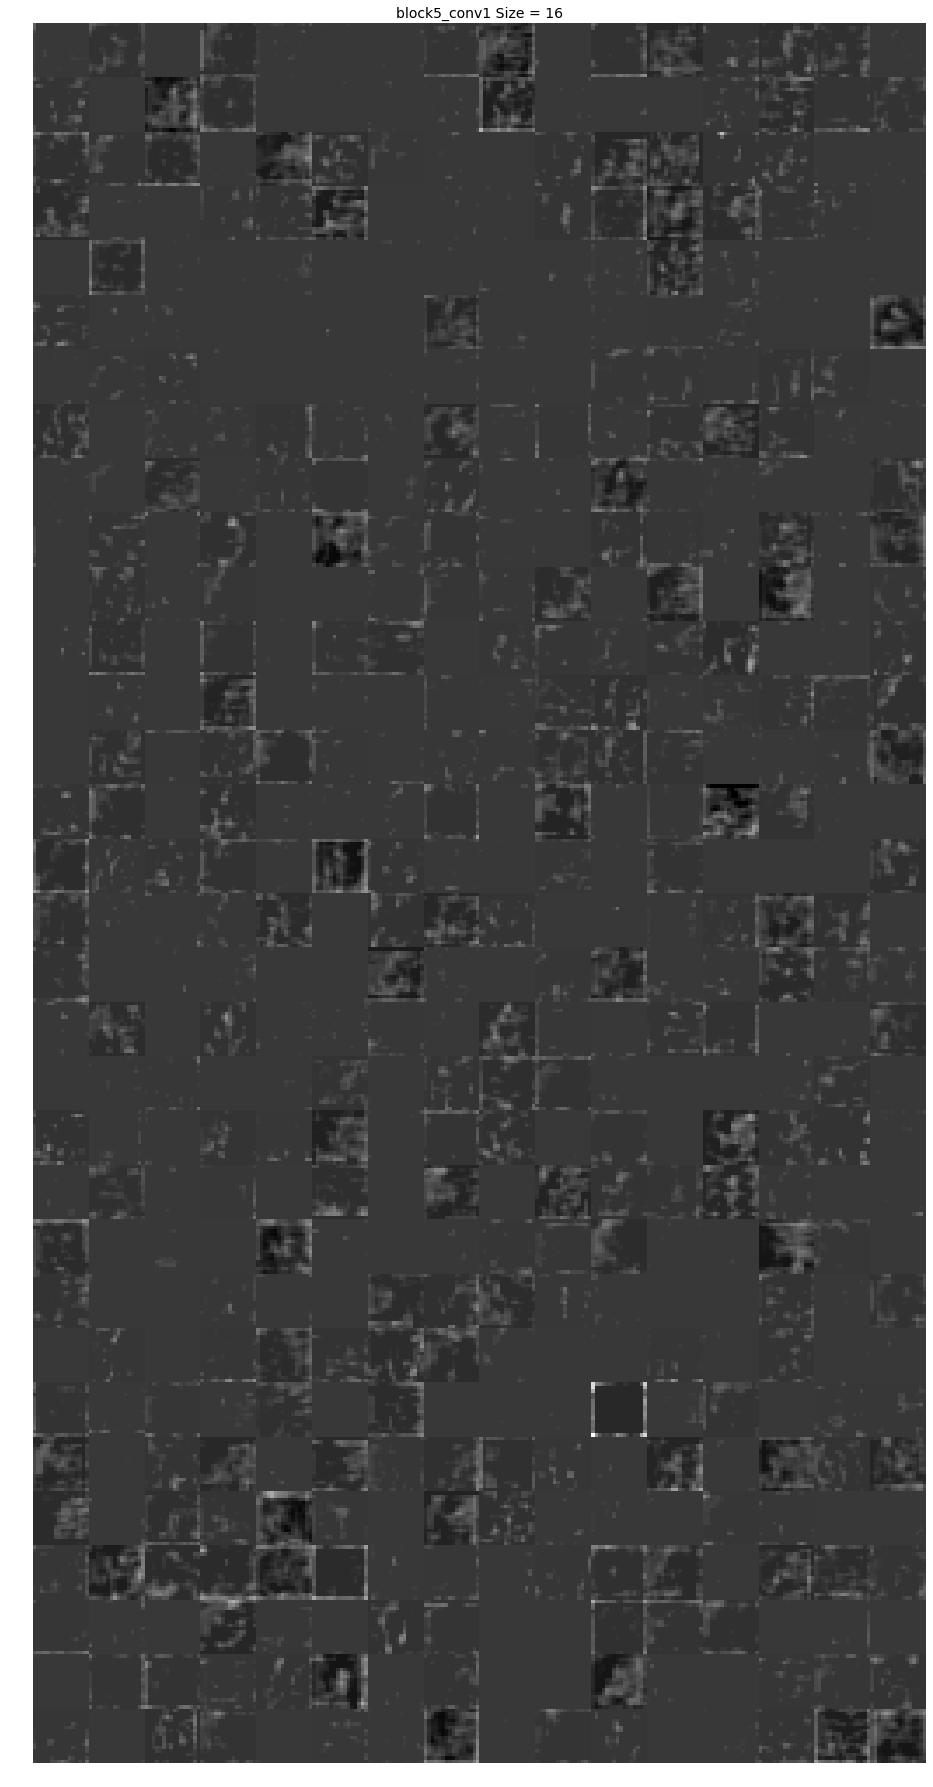

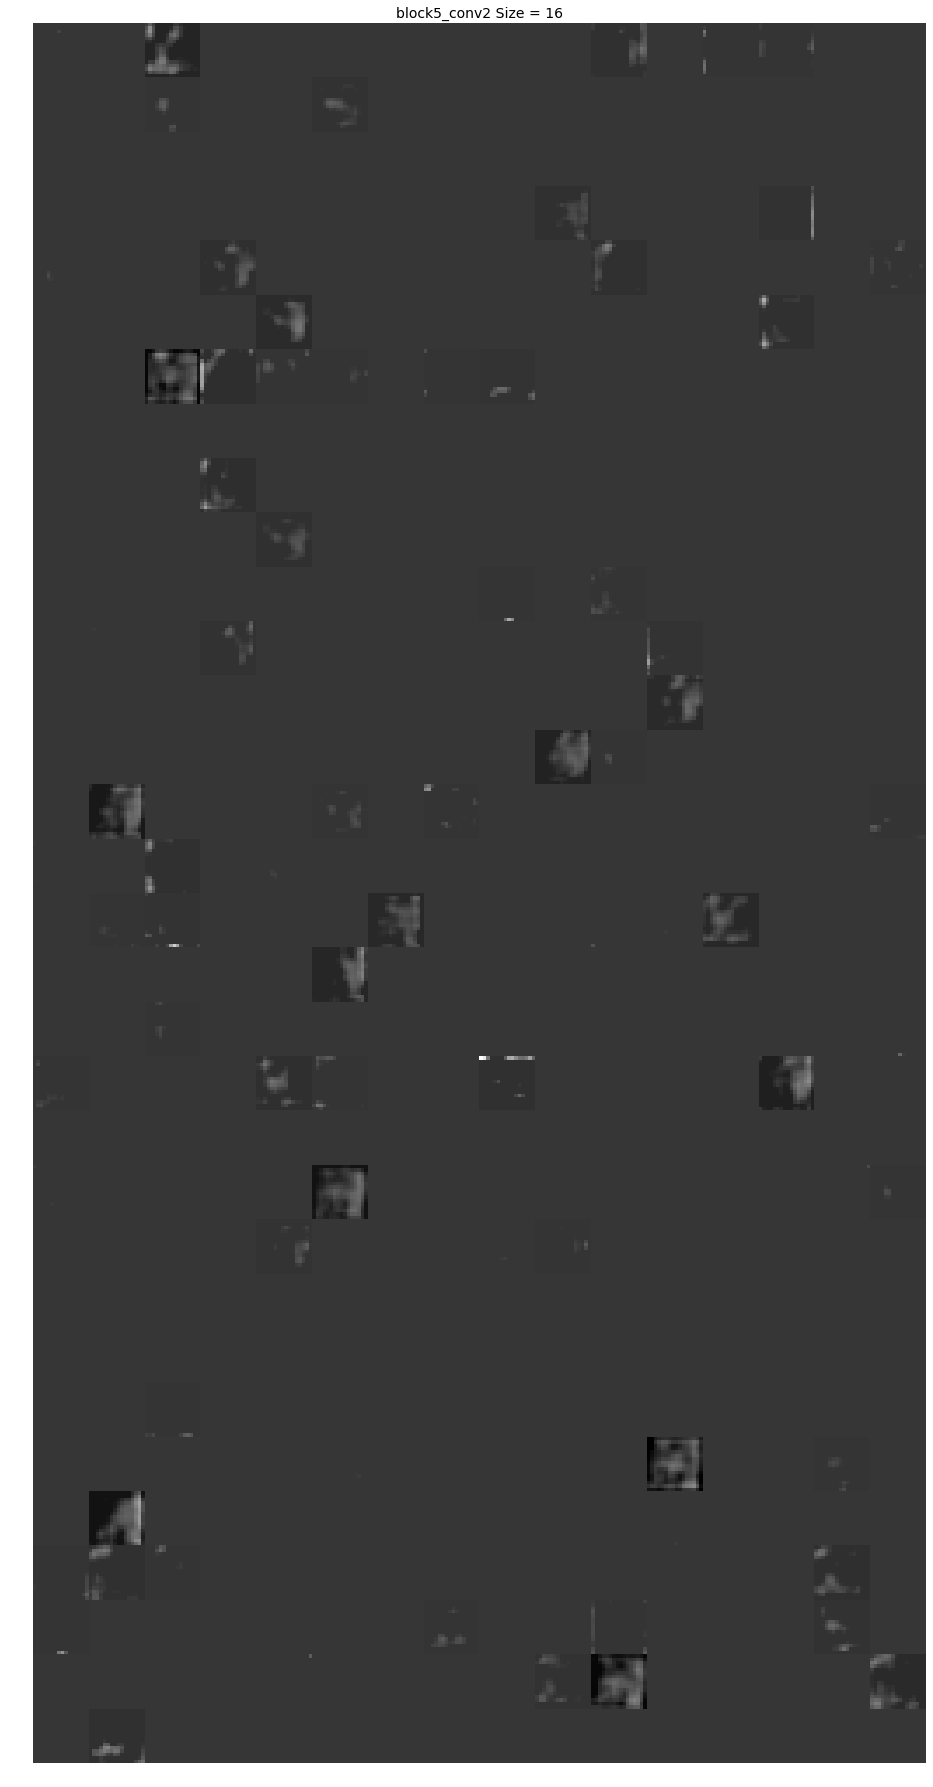

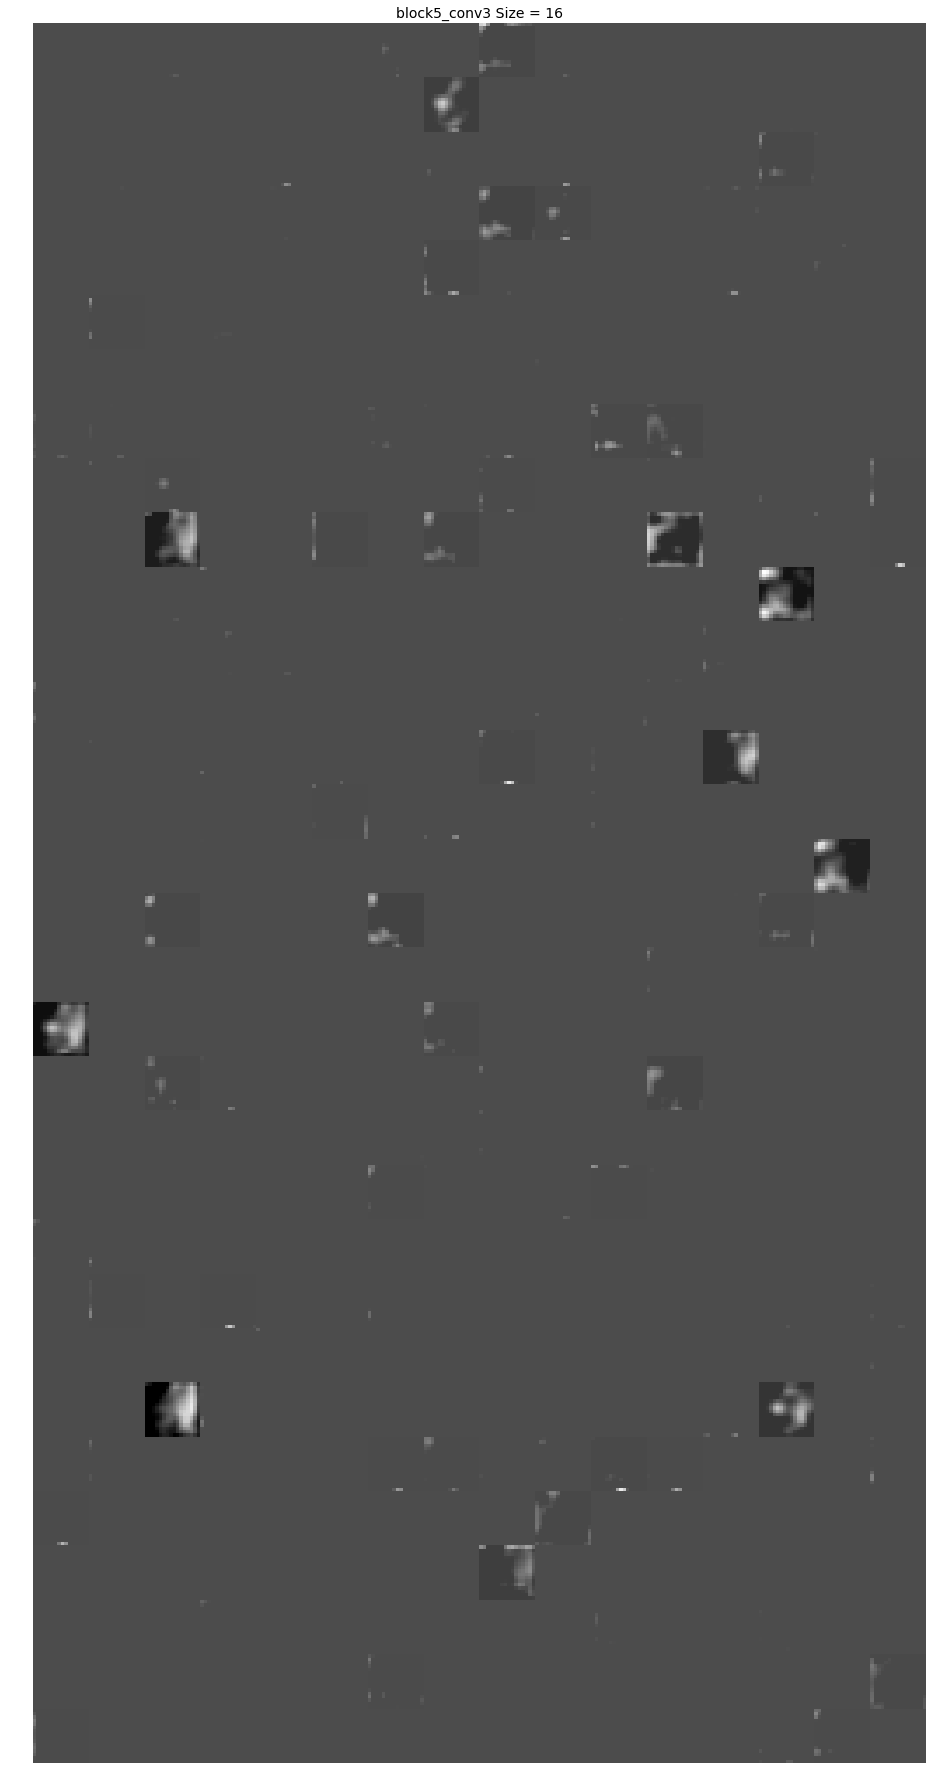

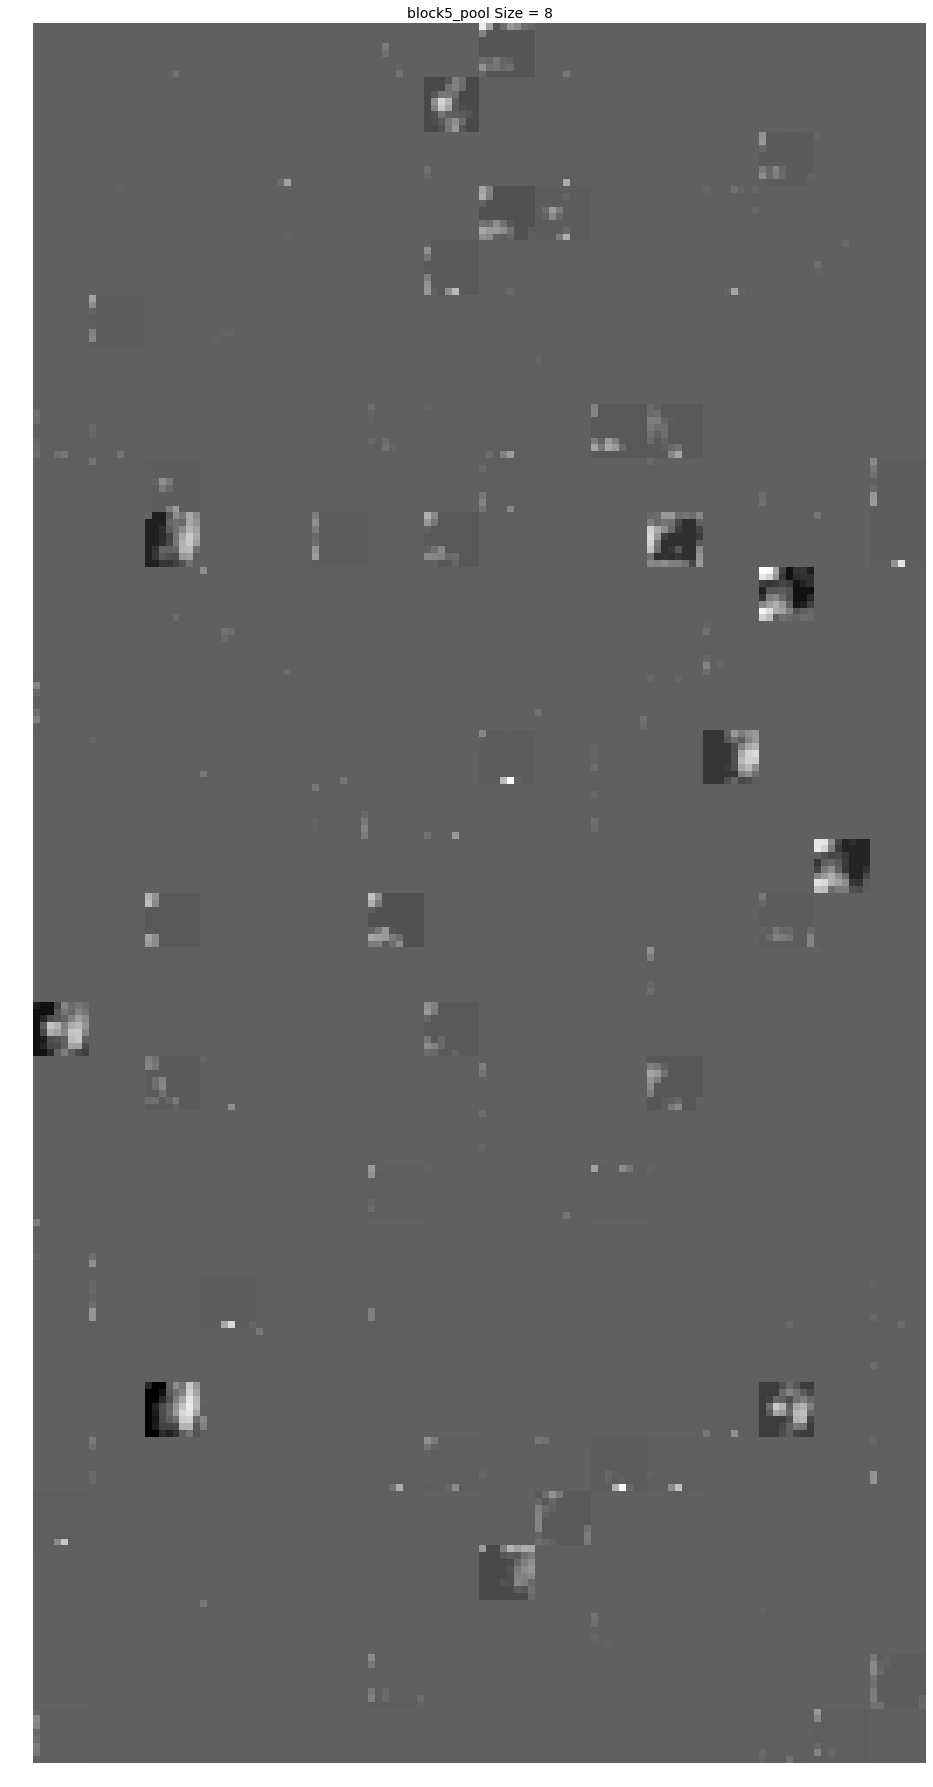

In [77]:
layer_names = []
for layer in model.layers[1:19]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image += 64
            channel_image += 128
            #channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize = (scale*display_grid.shape[1],
                          scale*display_grid.shape[0]))
    plt.title(layer_name+' Size = '+str(size), fontsize = 14)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(display_grid, aspect = 'auto', cmap='gray')
    plt.savefig('{}_{}.png'.format(layer_name, str(size)), bbox_inches = 'tight')
    plt.show()

In [89]:
import keras
#import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import os
import pydot_ng as pyd


#os.environ["PATH"] += os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'
keras.utils.vis_utils.pydot = pyd

plot_model(model, to_file='../Documents/Images_modeling/CNN_model.png',\
          show_shapes = True)

In [39]:
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm
#from vis.modifiers import Jitter
from vis.optimizer import Optimizer
from vis.visualization import visualize_activation, visualize_saliency, overlay
from vis.callbacks import GifGenerator

#actimage = visualize_activation(model, 21, \
#                                filter_indices = [0, 1])

salimage = visualize_saliency(model, 21, filter_indices = [0], seed_input = im_temp)
# The name of the layer we want to visualize
# (see model definition in vggnet.py)
#layer_name = 'dense_22'#'predictions'
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
#output_class = [0]#[20]

#losses = [
#    (ActivationMaximization(model.layers[10], output_class), 2),
#    (LPNorm(model.input), 10),
#    (TotalVariation(model.input), 10)
#]
#opt = Optimizer(model.input, losses)
#opt.minimize(max_iter=500, verbose=True, callbacks=[GifGenerator('opt_progress')])

In [49]:
salimage2 = np.array(salimage)
salimage3 = map(lambda x: x**2, salimage2)
salimage4 = []
salimage4 = np.array(salimage3)

print(salimage3)

salimage_df = pd.DataFrame(salimage)
#salimage_df = salimage_df.map(lambda x: x**2)

plt.imshow(salimage3, alpha = 1, cmap = 'jet')
plt.imshow(im_temp[0,:,:,0], alpha = 0.4, cmap = 'gray')
#plt.imshow(overlay(salimage, im_temp[0,:,:,0], alpha = 0.1))

ValueError: setting an array element with a sequence.